In [2]:
import os

In [15]:
os.listdir("D:/lifescience_book/chest_x_ray/chest_xray/train/")

['NORMAL', 'PNEUMONIA']

In [16]:
os.listdir("D:/lifescience_book/chest_x_ray/chest_xray/test/")

['NORMAL', 'PNEUMONIA']

In [17]:
os.listdir("D:/lifescience_book/chest_x_ray/chest_xray/val/")

['NORMAL', 'PNEUMONIA']

In [18]:
train_dir="D:/lifescience_book/chest_x_ray/chest_xray/train/"

In [19]:
test_dir="D:/lifescience_book/chest_x_ray/chest_xray/test/"

In [20]:
val_dir="D:/lifescience_book/chest_x_ray/chest_xray/val/"

In [21]:
#train
os.listdir(train_dir)
train_n=train_dir+"NORMAL/"
train_p=train_dir+"PNEUMONIA/"

In [23]:
#normal pic
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
print(len(os.listdir(train_n)))
rand_norm=np.random.randint(0,len(os.listdir(train_n)))
norm_pic=os.listdir(train_n)[rand_norm]
print("normal picture title:",norm_pic)

norm_pic_address=train_n+norm_pic

1341
normal picture title: NORMAL2-IM-0718-0001.jpeg


In [26]:
#pneumonia
rand_p=np.random.randint(0,len(os.listdir(train_p)))
sic_pic=os.listdir(train_p)[rand_norm]
sic_address=train_p+sic_pic
print("pneumonia picture title:",sic_pic)

pneumonia picture title: person1405_bacteria_3567.jpeg


Text(0.5, 1.0, 'Pneumonia')

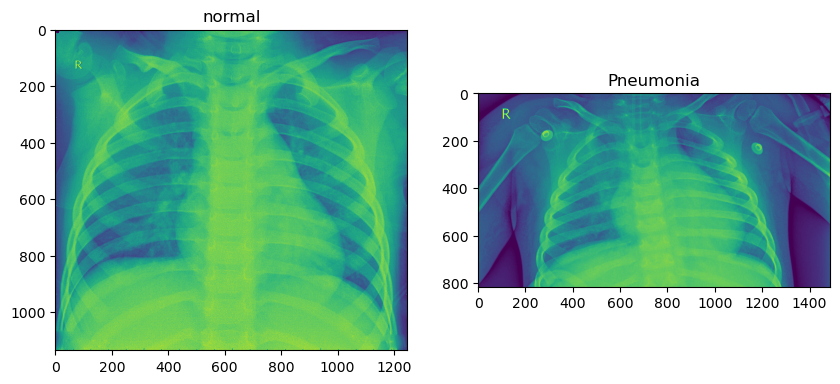

In [27]:
#load the images
norm_load=Image.open(norm_pic_address)
sic_load=Image.open(sic_address)
#let's plt these images
f=plt.figure(figsize=(10,6))
a1=f.add_subplot(1,2,1)
img_plot=plt.imshow(norm_load)
a1.set_title("normal")

a2=f.add_subplot(1,2,2)
img_plot=plt.imshow(sic_load)
a2.set_title("Pneumonia")

In [28]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
train_generator=ImageDataGenerator(rescale=1/255,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)
training_generator=train_generator.flow_from_directory(train_dir,target_size=(224,224),batch_size=4,class_mode='binary')

Found 5216 images belonging to 2 classes.


In [31]:
val_generator=ImageDataGenerator(rescale=1/255.0)
validation_generator=val_generator.flow_from_directory(val_dir,target_size=(224,224),batch_size=12,class_mode='binary')

Found 16 images belonging to 2 classes.


In [32]:
test_generator=ImageDataGenerator(rescale=1/255.0)
test_generator=test_generator.flow_from_directory(test_dir,target_size=(224,224,3),batch_size=12,class_mode='binary')

Found 624 images belonging to 2 classes.


In [34]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:

import tensorflow as tf

print("tensorflow version {}".format(tf.__version__))

tensorflow version 2.12.0


In [40]:
pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [42]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D

In [44]:
resnet=ResNet50(input_shape=[224,224,3],weights='imagenet',include_top=False)

94765736/94765736 [==============================] - 66s 1us/step


In [45]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [47]:
pip install visualkeras

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 43.2/43.2 kB 191.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [49]:
for layers in resnet.layers[:50]:
    layers.trainable=False

In [50]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
x = Flatten()(resnet.output)

In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
prediction = Dense(1, activation='sigmoid')(x)
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [52]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [54]:
pip install BatchNormalization

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement BatchNormalization (from versions: none)
ERROR: No matching distribution found for BatchNormalization


In [55]:
from tensorflow.keras.layers import BatchNormalization

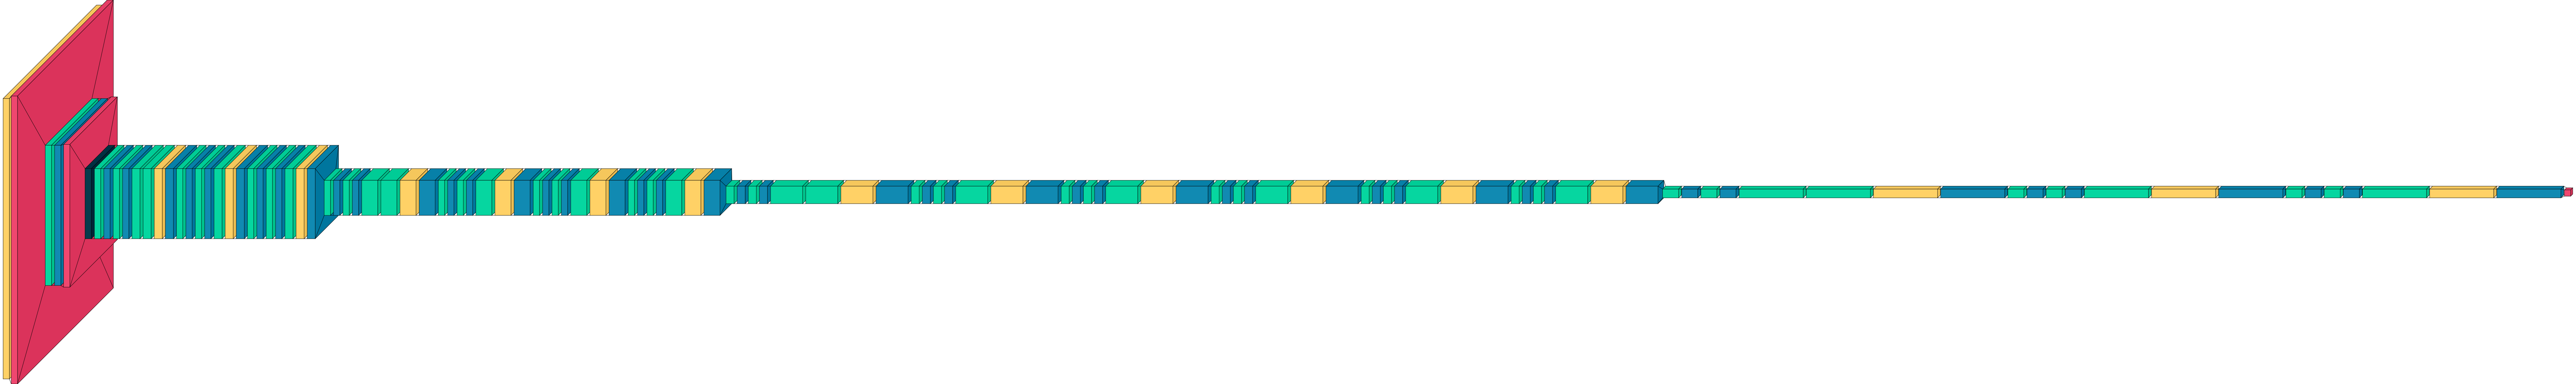

In [56]:
import visualkeras
visualkeras.layered_view(model, type_ignore=[ ZeroPadding2D,BatchNormalization,Flatten,Dropout])

In [57]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit_generator(training_generator,validation_data = validation_generator,epochs = 20, verbose = 1)

C:\Users\admin\AppData\Local\Temp\ipykernel_14516\3671408333.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_generator,validation_data = validation_generator,epochs = 20, verbose = 1)


Epoch 1/20
  17/1304 [..............................] - ETA: 53:40 - loss: 6.0246 - acc: 0.6471

In [ ]:
accuracy=history.history['acc']
loss=history.history['loss']
val_accuracy=history.history['val_acc']
val_loss=history.history['val_loss']

In [ ]:
epochs = range(len(accuracy))
epochs

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs,accuracy,'r',label='training_accuracy')
plt.plot(epochs,val_accuracy,'g',label='val_accuracy')
plt.legend()
plt.show()